In [1]:
## 1D heat equation using scipy fft
#Representing concentration as u.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size':18})


D = 10e-6
L = 10 ## Define the length of the rod
N = 1000 ## No. of points between 0 to L
dx = L/N
x = np.arange(-L/2,L/2,dx) ## Define x range

### Define the time interval
dt = 0.1
t = np.arange(0,1000,dt)

### omega_n = n*pi/L  - dicrete frequencies
omega = np.pi*np.fft.fftfreq(N,d =dx)  #2nd arg=timestep in signal #1st =signal size=N if signal is an array of N elements

Text(0, 0.5, 'Initial Concentration')

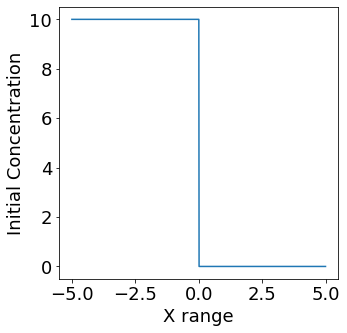

In [2]:
## Initialize the function U(Concentration) and plot it
#surface of iron is at x=0
#x<0 -> carbon
#x>0 -> iron matrix
u_initial = np.zeros_like(x)

for i, j in enumerate(x):
    if j <= 0:
        u_initial[i] = 10
    else:
        u_initial[i] = 0

## Plotting
plt.plot(x ,u_initial)
plt.xlabel('X range')
plt.ylabel('Initial Concentration')

### Heat Equation
#### If u is the function representing the temperature with Diffusivity D, then
$$ \frac{du}{dt} = D\frac{d^{2}u}{dx^{2}} $$
#### Taking fourier transform we get
$$ FT(u) = u_{ft}$$
$$ \frac{du_{ft}}{dt} = -w^{2}Du_{ft}$$
#### Solve the ODE and take the inverse to get the solution
$$ u_{soln} = IFT(u_{Ft})$$


### Define the respective functions

In [3]:
### Get the fourier transform of the initial temperature 
### Odeint function takes in real numbers as input -> therefore concatenate the real ansd imaginary coeff
def get_fourier_transform(u):
    u_ft = np.fft.fft(u)                         #has N pts
    return np.concatenate((u_ft.real,u_ft.imag)) #has 2*N pts

def get_inverse_fourier_transform(u_ft):
    u = np.fft.ifft(u_ft)
    return u.real

def get_complex_num_form(u_ft):                  #takes in 2*N pts
    return u_ft[:N] + (1j)*u_ft[N:]              #gives N pts

### Get the RHS of the differential eqaution

In [4]:
def rhs_diff_eqn(u_ft_separate,t,omega,c):
    u_ft = get_complex_num_form(u_ft_separate)
    d_uft = D * (np.power(omega,2))*u_ft
    d_uft_separate = np.concatenate((d_uft.real,d_uft.imag))
    return d_uft_separate

### Solving the ODEs

In [5]:
### Solve the individual ODEs -> The output will be a concatenated list of real and imaginary coefficients
### stored in usoln_ft_separate
u_ft_separate = get_fourier_transform(u_initial)
usoln_ft_separate = odeint(rhs_diff_eqn, u_ft_separate ,t,args= (omega,D))

### Get the inverse fourier transform of the solution

In [6]:
u_soln = np.zeros((len(t),len(x)))
for k in range(len(t)):
    usoln_ft = get_complex_num_form(usoln_ft_separate[k,:])
    u_soln[k,:] = get_inverse_fourier_transform(usoln_ft)

### Plot the solution for each time 't' 

Text(0, 0.5, 'COncentration')

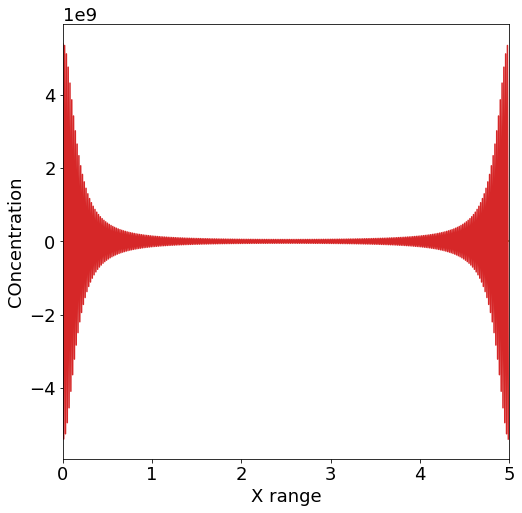

In [15]:
plt.figure(figsize=(8,8))
p1=plt.plot(x,u_soln[0])
p2=p1=plt.plot(x,u_soln[10])
p3=plt.plot(x,u_soln[100])
p4=plt.plot(x,u_soln[1000])
plt.xlim([0,5])
plt.xlabel('X range')
plt.ylabel('COncentration')
